In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd


In [2]:
# Load data
file = "https://blackjack-unc-project4.s3.us-east-2.amazonaws.com/BlackJack.csv"

df = pd.read_csv(file)
df.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12


In [12]:
# Get first two cards vs total hand and win
windf = df['winloss'] == 'Win'
wlrdf = df[windf]
wlrdf = wlrdf[["ply2cardsum","sumofcards"]]
wlrdf = wlrdf.rename(columns={"ply2cardsum":"First 2 Cards", "sumofcards":"Final Winning Hand"})
wlrdf.head()

,First 2 Cards,Final Winning Hand
1,19,19
6,14,14
7,13,13
8,12,12
9,15,15


In [26]:
wgbdf = wlrdf.groupby(['First 2 Cards'],as_index=False).count()
wgbdf = wgbdf.rename(columns={"First 2 Cards":"First 2 Cards", "Final Winning Hand":"Win Count"})
wgbdf.head()

,First 2 Cards,Win Count
0,2,524
1,3,1241
2,4,3336
3,5,5327
4,6,7123


In [5]:
# Get first two cards vs total hand and loss
lossdf = df['winloss'] == 'Loss'
llrdf = df[lossdf]
llrdf = llrdf[["ply2cardsum","sumofcards"]]
llrdf = llrdf.rename(columns={"ply2cardsum":"First 2 Cards", "sumofcards":"Final Losing Hand"})
llrdf.head()

,First 2 Cards,Final Losing Hand
0,17,17
2,17,17
3,12,17
4,12,17
5,7,25


In [34]:
lgbdf = llrdf.groupby(['First 2 Cards'],as_index=False).count()
lgbdf = lgbdf.rename(columns={"First 2 Cards":"First 2 Cards", "Final Losing Hand":"Loss Count"})
lgbdf.head()

,First 2 Cards,Loss Count
0,2,984
1,3,2609
2,4,6320
3,5,10350
4,6,13808


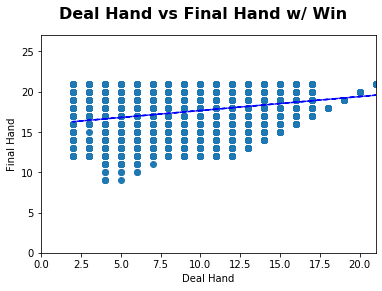

In [7]:
# Get LR variables
firsttwo = wlrdf.iloc[:, 0]
total = wlrdf.iloc[:,1]

# Set line
(slope, intercept, _, _, _) = linregress(firsttwo, total)
fit = slope * firsttwo + intercept
fit

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Deal Hand vs Final Hand w/ Win", fontsize=16, fontweight="bold")

ax.set_xlim(0, 21)
ax.set_ylim(0, 27)

ax.set_xlabel("Deal Hand")
ax.set_ylabel("Final Hand")

ax.plot(firsttwo, total, linewidth=0, marker='o')
ax.plot(firsttwo, fit, 'b--')

plt.show()

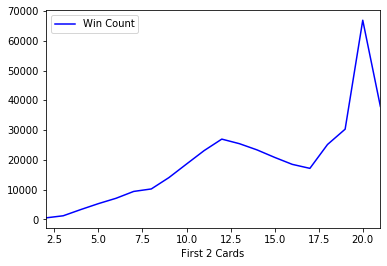

In [32]:
# Win count based on first two cards

wgbdf.plot(kind='line',x='First 2 Cards',y='Win Count',color='blue')
plt.show()

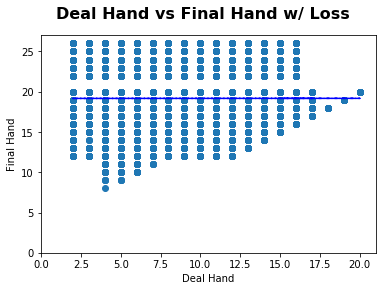

In [8]:
# Get LR variables
firsttwo = llrdf.iloc[:, 0]
total = llrdf.iloc[:,1]

# Set line
(slope, intercept, _, _, _) = linregress(firsttwo, total)
fit = slope * firsttwo + intercept
fit

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Deal Hand vs Final Hand w/ Loss", fontsize=16, fontweight="bold")

ax.set_xlim(0, 21)
ax.set_ylim(0, 27)

ax.set_xlabel("Deal Hand")
ax.set_ylabel("Final Hand")

ax.plot(firsttwo, total, linewidth=0, marker='o')
ax.plot(firsttwo, fit, 'b--')

plt.show()

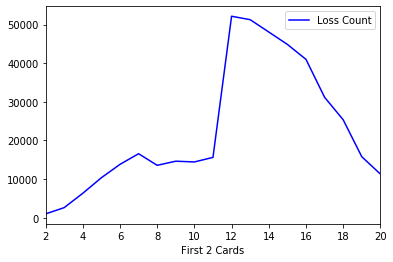

In [35]:
# Loss count based on first two cards

lgbdf.plot(kind='line',x='First 2 Cards',y='Loss Count',color='blue')
plt.show()